In [29]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from keras.layers import Dense, Flatten
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
import random as rn
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
import matplotlib.pyplot as plt
from keras.regularizers import l1, l2
from tensorflow.keras.layers import LeakyReLU
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from PIL import Image

# 1. Loading data from each directory and assigning labels

In [53]:
img_width = 320
img_height = 320

X = []
y = []

In [54]:
labels =  os.listdir('flowers')
labels

['daisy', 'rose', 'tulip', 'dandelion', 'sunflower']

In [55]:
daisy_path = "flowers/daisy"
dandelion_path = "flowers/dandelion"
rose_path = "flowers/rose"
sunflower_path = "flowers/sunflower"
tulip_path = "flowers/tulip"


In [56]:
def make_training_data(flower_type,folder_path):
    # Iterate over the images in the directory
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust file extensions as needed
            image_path = os.path.join(folder_path, filename)
            
            # Open and resize the image
            image = Image.open(image_path)
            image = image.resize((img_width, img_height))
            
            # Convert the image to a numpy array and store it in the list
            X.append(np.array(image))
            y.append(str(flower_type))

In [57]:
make_training_data('Daisy',daisy_path)
print(len(X))

764


In [58]:
make_training_data('Dandelion',dandelion_path)
print(len(X))

1816


In [59]:
make_training_data('Rose',rose_path)
print(len(X))

2600


In [60]:

make_training_data('Sunflower',sunflower_path)
print(len(X))

3333


In [61]:
make_training_data('Tulip',tulip_path)
print(len(X))

4317


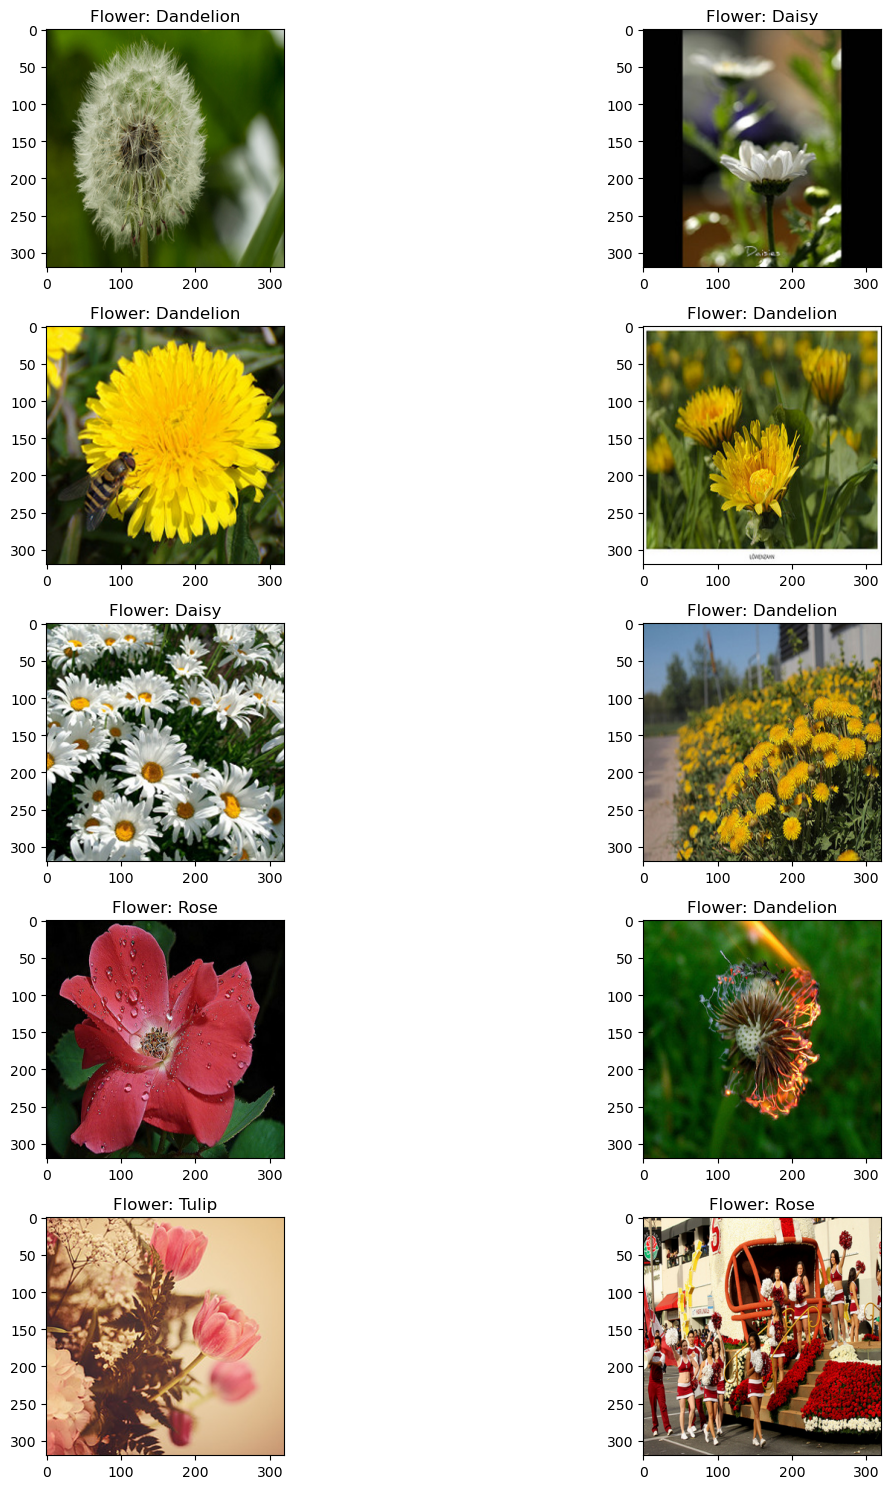

In [62]:
## visualizing some random images

fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+y[l])
        
plt.tight_layout()

# 2. Image pre-processing

In [63]:
le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [65]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


# 3. Model preparation

In [38]:
model = Sequential()

# first convolution layer
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',strides=(1,1),input_shape = (320,320,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',strides=(1,1)))
model.add(Activation('relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',strides=(1,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# second convolution layer
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',strides=(1,1)))
model.add(Activation('relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',strides=(1,1)))
model.add(Activation('relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',strides=(1,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# MLP
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))


In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 240, 320, 32)      896       
                                                                 
 activation_7 (Activation)   (None, 240, 320, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 240, 320, 32)      9248      
                                                                 
 activation_8 (Activation)   (None, 240, 320, 32)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 240, 320, 32)      9248      
                                                                 
 activation_9 (Activation)   (None, 240, 320, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 120, 160, 32)    

In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_firstCNN = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))


Epoch 1/10


2023-07-14 14:59:26.236512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - ETA: 0s - loss: 2.3920 - accuracy: 0.2833

2023-07-14 15:01:18.118662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 119s 4s/step - loss: 2.3920 - accuracy: 0.2833 - val_loss: 1.3459 - val_accuracy: 0.4278
Epoch 2/10
26/26 [==============================] - 113s 4s/step - loss: 1.2229 - accuracy: 0.4847 - val_loss: 1.2695 - val_accuracy: 0.4759
Epoch 3/10
26/26 [==============================] - 90s 3s/step - loss: 1.1295 - accuracy: 0.5267 - val_loss: 1.1577 - val_accuracy: 0.5269
Epoch 4/10
26/26 [==============================] - 89s 3s/step - loss: 1.0420 - accuracy: 0.5910 - val_loss: 1.0820 - val_accuracy: 0.5630
Epoch 5/10
26/26 [==============================] - 87s 3s/step - loss: 0.9376 - accuracy: 0.6348 - val_loss: 1.0848 - val_accuracy: 0.5750
Epoch 6/10
26/26 [==============================] - 99s 4s/step - loss: 0.8461 - accuracy: 0.6793 - val_loss: 1.2659 - val_accuracy: 0.5398
Epoch 7/10
26/26 [==============================] - 97s 4s/step - loss: 0.8231 - accuracy: 0.6926 - val_loss: 1.1078 - val_accuracy: 0.5676
Epoch 8/10
26/26 [===========